# Target Outliers

In [16]:
import datetime, time, os

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import pandas as pd

from functools import reduce

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import plotly.graph_objects as go
# Create traces

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_pickle('../data/pickle/df_merged_5.pickle')

## Visualisation 

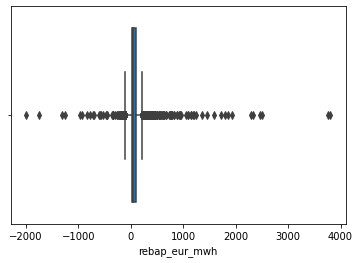

In [18]:
## Check for outliers in 'rebap_eur_mwh' column
'''
Quantiles, specifically the first and third quantiles, which correspond to the 25th and 75th percentiles.
Median, the mid-point in the distribution, which also corresponds to the 50th percentile.
Interquartile range (IQR), the width between the third and first quantiles. Expressed mathematically, we have IQR = Q3—Q1.
Min, minimum value in the dataset excluding outliers, which corresponds to Q1–1.5xIQR.
Max, maximum value in the dataset, excluding outliers, which corresponds to Q3+1.5xIQR.
'''
sns.boxplot(x=df['rebap_eur_mwh'])
plt.show()

We can observe a high price range from almost -2000 to 4000 €/MWh.

In [19]:
median = np.median(df.rebap_eur_mwh)
upper_quartile = np.percentile(df.rebap_eur_mwh, 75)
lower_quartile = np.percentile(df.rebap_eur_mwh, 25)

iqr = upper_quartile - lower_quartile
lower_outlier = lower_quartile - 1.5 * iqr
upper_outlier = upper_quartile + 1.5 * iqr


#upper_whisker = df[df<=upper_quartile+1.5*iqr].max()
#lower_whisker = df[df>=lower_quartile-1.5*iqr].min()


In [20]:
print(upper_quartile)
print(iqr)
print(lower_outlier)
print(upper_outlier)

98.85
81.03999999999999
-103.74999999999999
220.40999999999997


In [21]:
count_1 = df["rebap_eur_mwh"][(df["rebap_eur_mwh"]>upper_outlier)].count()
count_2 = df["rebap_eur_mwh"][(df["rebap_eur_mwh"]<lower_outlier)].count()
count_3 = (count_1+count_2)/df["rebap_eur_mwh"].count()

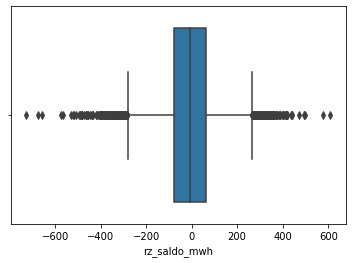

In [22]:
# Check for outliers in 'rz_saldo_mwh' column
sns.boxplot(x=df['rz_saldo_mwh'])
plt.show()

In [23]:
print("This data set contains " + str(count_1) + " prices definded as upper outliers (values > " + str(round(upper_outlier,2)) + " €/MWh) and " + str(count_2) + 
      " observations lower as " + str(round(lower_outlier,2)) + "€/MWh. This represents " + str(round(count_3,3)*100) + "% of all observations.")

This data set contains 324 prices definded as upper outliers (values > 220.41 €/MWh) and 140 observations lower as -103.75€/MWh. This represents 2.7% of all observations.


In [29]:
#Create a data frame of outliers data frame.
df_outlier = df[(df["rebap_eur_mwh"]<lower_outlier) | (df["rebap_eur_mwh"]>upper_outlier)]
print("We created a data frame of outliers. It has the lenght of", df_outlier.shape[0]+1, "rows.")

We created a data frame of outliers. It has the lenght of 465 rows.


# Ouliers by time granularity

We analyse the outlier data frame by categorize it time: months, weekdays, business days and daytime

## Outliers by months

In [36]:
df_outlier_month = df_outlier.groupby(df_outlier.index.month).count().reset_index()
print(df_outlier_month["rebap_eur_mwh"].mean())
df_outlier_month

77.33333333333333


,dt_start_utc,50Hertz_power_mw_x,DE_power_mw_x,DK_power_mw_x,DK1_power_mw_x,TTG_power_mw_x,total_pred_cons,Biomasse[MWh],Wasserkraft[MWh],Wind Offshore[MWh],...,50Hertz_power_mw_y,DE_power_mw_y,DK_power_mw_y,DK1_power_mw_y,TTG_power_mw_y,50Hertz_power_mw_y,DE_power_mw_y,DK_power_mw_y,DK1_power_mw_y,TTG_power_mw_y
0,1,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
1,2,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96
2,3,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
3,4,91,91,91,91,91,91,91,91,91,...,91,91,91,91,91,91,91,91,91,91
4,5,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
5,6,73,73,73,73,73,73,73,73,73,...,73,73,73,73,73,73,73,73,73,73


In [62]:
fig = px.bar(df_outlier_month, x='dt_start_utc', y='rebap_eur_mwh', text='rebap_eur_mwh')
fig.update_traces(texttemplate='%{text}', textposition='outside', cliponaxis = False)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_layout(
    title="Outliers by Months",
    xaxis_title="Month",
    yaxis_title="Outliers per Month",
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4, 5, 6],
        ticktext=["January","February", "March", "April", "May", "June"]),
    legend_title="",
    font=dict(
        family="Arial",
        size=12,
        color="Black"
    )
)

fig.show()

We can see a significant drop of outliers in March.

## Weekdays

In [63]:
df_outlier_weekday = df_outlier.groupby(df_outlier.index.weekday).count().reset_index()
print(df_outlier_weekday["rebap_eur_mwh"].mean())
df_outlier_weekday.head()

66.28571428571429


,dt_start_utc,50Hertz_power_mw_x,DE_power_mw_x,DK_power_mw_x,DK1_power_mw_x,TTG_power_mw_x,total_pred_cons,Biomasse[MWh],Wasserkraft[MWh],Wind Offshore[MWh],...,50Hertz_power_mw_y,DE_power_mw_y,DK_power_mw_y,DK1_power_mw_y,TTG_power_mw_y,50Hertz_power_mw_y,DE_power_mw_y,DK_power_mw_y,DK1_power_mw_y,TTG_power_mw_y
0,0,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
1,1,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
2,2,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
3,3,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
4,4,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47


In [64]:
fig = px.bar(df_outlier_weekday, x='dt_start_utc', y='rebap_eur_mwh', text='rebap_eur_mwh')
fig.update_traces(texttemplate='%{text}', textposition='outside', cliponaxis = False)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_layout(
    title="Outliers on Weekdays",
    xaxis_title="Day",
    yaxis_title="Outliers per Day",
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1, 2, 3, 4, 5, 6],
        ticktext=["Monday","Tueday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]),
    legend_title="",
    font=dict(
        family="Arial",
        size=12,
        color="Black"
    )
)

fig.show()

On both weekdays, Monday and Tuesday, we observe the max outiers counts. On the following business days the number of outliers drops significantly, while the outliers raise on the weekend again.

## Outliers by daytime in hours

In [55]:
df_outlier_hour = df_outlier.groupby(df_outlier.index.hour).count().reset_index()
print(df_outlier_hour["rebap_eur_mwh"].mean())
df_outlier_hour.head()

19.333333333333332


,dt_start_utc,50Hertz_power_mw_x,DE_power_mw_x,DK_power_mw_x,DK1_power_mw_x,TTG_power_mw_x,total_pred_cons,Biomasse[MWh],Wasserkraft[MWh],Wind Offshore[MWh],...,50Hertz_power_mw_y,DE_power_mw_y,DK_power_mw_y,DK1_power_mw_y,TTG_power_mw_y,50Hertz_power_mw_y,DE_power_mw_y,DK_power_mw_y,DK1_power_mw_y,TTG_power_mw_y
0,0,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1,1,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2,2,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
3,3,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
4,4,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [56]:
fig = px.bar(df_outlier_hour, x='dt_start_utc', y='rebap_eur_mwh', text='rebap_eur_mwh')
fig.update_traces(texttemplate='%{text}', textposition='outside', cliponaxis = False)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_layout(
    title="Outliers on Weekdays",
    xaxis_title="Day",
    yaxis_title="Outliers per Day",
    #xaxis = dict(
    #    tickmode = 'array',
    #    tickvals = [0, 1, 2, 3, 4, 5, 6],
    #    ticktext=["Monday","Tueday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]),
    legend_title="",
    font=dict(
        family="Arial",
        size=12,
        color="Black"
    )
)

fig.show()

We can observe four phases in this distribution. A low phase from 19 - 4 o'clock with a local high at 23 o'clock. A high phase from 5 - 7 o'clock with a local max at 6 o'clock. A constant phase of outliers between 23-29 from 10 to 15 o'clock.   

## Outliers by daytime on business days

In [57]:
df_bhour_count = df_outlier[df_outlier.index.dayofweek < 5].groupby(df_outlier[df_outlier.index.dayofweek < 5].index.hour).count().reset_index()
print(df_bhour_count["rebap_eur_mwh"].mean())
df_bhour_count.head()

13.625


,dt_start_utc,50Hertz_power_mw_x,DE_power_mw_x,DK_power_mw_x,DK1_power_mw_x,TTG_power_mw_x,total_pred_cons,Biomasse[MWh],Wasserkraft[MWh],Wind Offshore[MWh],...,50Hertz_power_mw_y,DE_power_mw_y,DK_power_mw_y,DK1_power_mw_y,TTG_power_mw_y,50Hertz_power_mw_y,DE_power_mw_y,DK_power_mw_y,DK1_power_mw_y,TTG_power_mw_y
0,0,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1,1,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,3,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,4,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


In [58]:
fig = px.bar(df_bhour_count, x='dt_start_utc', y='rebap_eur_mwh', text='rebap_eur_mwh')
fig.update_traces(texttemplate='%{text}', textposition='outside', cliponaxis = False)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_layout(
    title="Outliers on Business Days",
    xaxis_title="Hours",
    yaxis_title="Outliers per hours",
   # xaxis = dict(
    #    tickmode = 'array',
     #   tickvals = [0, 4, 8, 12, 16, 20],
      #  ticktext=["00:00","04:00", "08:00", "12:00", "16:00", "20:00"]),
    legend_title="",
    font=dict(
        family="Arial",
        size=12,
        color="Black"
    )
)

fig.show()

The business days distribution is quite similar to the weekday distribution, but it has a stronger pronounced right skrewed distribution characteristic. 